# Natural Language processing - Text Classification

## Prerequisites for this course
1. Basic Python Programming 
2. Basic Python Libraries
3. Basic Classification model building and evaluation

Incase you do not have the necessary knowledge of these topics kindly check out our Refactored.ai course on the same:
1. [Python for Data Scientists](https://refactored.ai/course/python-for-data-scientists/)
2. [Data Science - II - Classification and Logistic Regression](https://refactored.ai/course/Data-Science---II/)

## Topics covered in this notebook:

* Introduction to text classification

### Text classification: definition

* Input:
 * a document d
 * a fixed set of classes C={ c1, c2, c3...., cj }
 
* Output: a predicted class

In simple words Text classification of a document is when you need to identify a set of classes for the document and the output of the classification would be a predicted class and the class probability of the document belonging to that class

### Classification methods:
1. Hand-coded rules
2. Machine learning models

#### Hand coded rules

* Rules based on combinations of words or other features
 * spam: black list address OR (“dollars” AND “have been selected”)
* Accuracy can be high
 * If rules carefully refined by expert
* But building and maintaining these rules is expensive

Hand coded rules are very precise and accurate but it's actually very difficult to maintain those rules as there can be 20,000 rules but maintaining them is not humanly possible

#### Supervised Machine Learning

* Input:
 * a document ___d___
 * a fixed set of classes ___C = { c1 , c2 ,…, cj }___
 * A training set of ___m___ hand labeled documents _____( d1,c1 ),...,( dm,cm )
* Output:
 * a learned classifier  $$γ:d \rightarrow c$$ 
 


### Classification Methods:
Supervised Machine Learning

Any kind of classifier
* Naïve Bayes
* Logistic regression
* Support vector machines
* k Nearest Neighbors

#### Naïve Bayes Intuition

* Simple (“naïve”) classification method based on Bayes rule
* Relies on very simple representation of document
 * Bag of words



### The bag of words representation

Naive bias is a simple method based on the Bayes rule which actually relies on a very simple representation of the document as a bag of words. 

Initial BOW

<img src="Images\BOW_1.PNG">


Highlighting the important words

<img src="Images\BOW_2.PNG">


The bag of words representation:<br>
Using a subset of words

<img src="Images\BOW_3.PNG">


So it's going to learn which words are indicative of a sentiment either positive or negative to learn that the rest of the words can be ignored because they have an identical weight or identical probability and appearing in both classes.

And then depending on the implementation of Naive bayes. We can either have a regular Naive bayes or we can have a binary Naive bayes. So with the regular one we actually look at the tokens and a frequency of the tokens and for the binary ones will only look at their presence and each of them have some pros and cons.


<img src="Images\BOW_4.PNG">

Multinomial Naïve Bayes Independence Assumptions:
* Bag of Words assumption: Assume position doesn’t matter
* Conditional Independence: Assume the feature probabilities P( xi | cj ) are independent given the class c.


* Naïve bayes classifiers can use any sort of feature
 * URL, email address, dictionaries, network features
* But if, as in the previous slides
 * We use __only__ word features
 * we use __all__ of the words in the text (not a subset)
* Then
 * Naïve bayes has an important similarity to language modeling

Each class = a unigram language model

* Assigning each word: P(word | c)
* Assigning each sentence: P(s|c)= P( word|c )

<img src="Images\NB_1.PNG">

Which class assigns the higher probability to s?

<img src="Images\NB_2.PNG">

### Summary: Naive Bayes is Not So Naive
* Very Fast, low storage requirements
* Robust to Irrelevant Features
 * Irrelevant Features cancel each other without affecting results
* Very good in domains with many equally important features
 * Decision Trees suffer from fragmentation in such cases especially if little data
* Optimal if the independence assumptions hold: If assumed independence is correct, then it is the Bayes Optimal Classifier for problem
* A good dependable baseline for text classification

## Advanced text mining with Python - Text Classification

In [66]:
#Run the following code
import sklearn
import pandas as pd

import wordcloud
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, HashingVectorizer, TfidfTransformer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn import metrics

## Part 1: Representing text as numerical data

In [8]:
# example text for model training (citation messages)
simple_train = ['The University of Chicago', \
                'private research university in Chicago', \
                'culturally rich and ethnically diverse coeducational research university', \
                'Chicago Chicago Chicago Chicago']
simple_train

['The University of Chicago',
 'private research university in Chicago',
 'culturally rich and ethnically diverse coeducational research university',
 'Chicago Chicago Chicago Chicago']

From the [scikit-learn documentation](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.feature_extraction.text):

> Text Analysis is a major application field for machine learning algorithms. However the raw data, a sequence of symbols cannot be fed directly to the algorithms themselves as most of them expect **numerical feature vectors with a fixed size** rather than the **raw text documents with variable length**.

In scikit-learn we have a choice of four different feature extraction mechanisms:
* CountVectorizer - Convert a collection of text documents to a matrix of token counts
* HashingVectorizer - Convert a collection of text documents to a matrix of token occurrences
* TfidfTransformer - Transform a count matrix to a normalized TF or TF-IDF representation
* TfidfVectorizer - Convert a collection of raw documents to a matrix of TF-IDF features.  Equivalent to CountVectorizer followed by TfidfTransformer

TfidF vs Count Vectorizer:
TfidF reduces the importance of repetitive tokens and highlights tokens which are less common.
Count Vectorizers highlight importance of a token based on most frequent.

### CountVectorizer

In [9]:
countvectorizer = CountVectorizer()
countvectorizer_matrix = countvectorizer.fit_transform(simple_train)
countvectorizer_matrix.shape

(4, 13)

In [10]:
countvectorizer_matrix_df = pd.DataFrame(countvectorizer_matrix.toarray(), columns=countvectorizer.get_feature_names())
countvectorizer_matrix_df

,and,chicago,coeducational,culturally,diverse,ethnically,in,of,private,research,rich,the,university
0,0,1,0,0,0,0,0,1,0,0,0,1,1
1,0,1,0,0,0,0,1,0,1,1,0,0,1
2,1,0,1,1,1,1,0,0,0,1,1,0,1
3,0,4,0,0,0,0,0,0,0,0,0,0,0


From the [scikit-learn documentation](http://scikit-learn.org/stable/modules/feature_extraction.html#text-feature-extraction):

> In this scheme, features and samples are defined as follows:

> - Each individual token occurrence frequency (normalized or not) is treated as a **feature**.
> - The vector of all the token frequencies for a given document is considered a multivariate **sample**.

> A **corpus of documents** can thus be represented by a matrix with **one row per document** and **one column per token** (e.g. word) occurring in the corpus.

> We call **vectorization** the general process of turning a collection of text documents into numerical feature vectors. This specific strategy (tokenization, counting and normalization) is called the **Bag of Words** or "Bag of n-grams" representation. Documents are described by word occurrences while completely ignoring the relative position information of the words in the document.

#### Removing stop-words from CountVectorizer

In [11]:
countvectorizer = CountVectorizer(stop_words='english')
countvectorizer_matrix = countvectorizer.fit_transform(simple_train)
countvectorizer_matrix.shape

(4, 9)

In [12]:
countvectorizer_matrix_df = pd.DataFrame(countvectorizer_matrix.toarray(), columns=countvectorizer.get_feature_names())
countvectorizer_matrix_df

,chicago,coeducational,culturally,diverse,ethnically,private,research,rich,university
0,1,0,0,0,0,0,0,0,1
1,1,0,0,0,0,1,1,0,1
2,0,1,1,1,1,0,1,1,1
3,4,0,0,0,0,0,0,0,0


#### Adding N-Gram features to CountVectorizer
word = word n-grams  
char = char n-grams  
char_wb = creates character n-grams only from text inside word boundaries; n-grams at the edges of words are padded with space.

In [14]:
countvectorizer = CountVectorizer(analyzer='word', ngram_range=(1,3))
#countvectorizer = CountVectorizer(analyzer='char', ngram_range=(1,3))
#countvectorizer = CountVectorizer(analyzer='char_wb', ngram_range=(1,3))
countvectorizer_matrix = countvectorizer.fit_transform(simple_train)
countvectorizer_matrix.shape

(4, 39)

In [15]:
countvectorizer_matrix_df = pd.DataFrame(countvectorizer_matrix.toarray(), columns=countvectorizer.get_feature_names())
countvectorizer_matrix_df

,and,and ethnically,and ethnically diverse,chicago,chicago chicago,chicago chicago chicago,coeducational,coeducational research,coeducational research university,culturally,...,rich and,rich and ethnically,the,the university,the university of,university,university in,university in chicago,university of,university of chicago
0,0,0,0,1,0,0,0,0,0,0,...,0,0,1,1,1,1,0,0,1,1
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,1,1,0,0
2,1,1,1,0,0,0,1,1,1,1,...,1,1,0,0,0,1,0,0,0,0
3,0,0,0,4,3,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Controlling features in CountVectorizer

max_df: When building the vocabulary ignore terms that have a document frequency strictly higher than the given threshold (corpus-specific stop words). If float, the parameter represents a proportion of documents, integer absolute counts. This parameter is ignored if vocabulary is not None.  
**When building the vocabulary, it ignores terms that have a document frequency strictly higher than the given threshold. This could be used to exclude terms that are too frequent and are unlikely to help predict the label. For example, by analyzing reviews on the movie Lion King, the term 'Lion' might appear in 90% of the reviews (documents), in which case, we could consider establishing Max_df=0.89**  

min_df: When building the vocabulary ignore terms that have a document frequency strictly lower than the given threshold. This value is also called cut-off in the literature. If float, the parameter represents a proportion of documents, integer absolute counts. This parameter is ignored if vocabulary is not None.  
**Min_df ignores terms that have a document frequency (presence in % of documents) strictly lower than the given threshold. For example, Min_df=0.66 requires that a term appear in 66% of the docuemnts for it to be considered part of the vocabulary.**    


max_features: If not None, build a vocabulary that only consider the top max_features ordered by term frequency across the corpus.

In [16]:
countvectorizer = CountVectorizer(lowercase=False, stop_words='english',
                                  max_df=0.8, min_df=0.2, max_features=1000, ngram_range=(1,3))
countvectorizer_matrix = countvectorizer.fit_transform(simple_train)
countvectorizer_matrix.shape

(4, 31)

In [17]:
countvectorizer_matrix_df = pd.DataFrame(countvectorizer_matrix.toarray(), columns=countvectorizer.get_feature_names())
countvectorizer_matrix_df

,Chicago,Chicago Chicago,Chicago Chicago Chicago,The,The University,The University Chicago,University,University Chicago,coeducational,coeducational research,...,private research,private research university,research,research university,research university Chicago,rich,rich ethnically,rich ethnically diverse,university,university Chicago
0,1,0,0,1,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,0,0,0,1,1
2,0,0,0,0,0,0,0,0,1,1,...,0,0,1,1,0,1,1,1,1,0
3,4,3,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### HashingVectorizer
The HashingVectorizer has a parameter n_features which is 2^20 = 1048576 by default. When hashing, they don't actually compute a dictionary mapping terms to a unique index to use for each one. Instead, you just hash each term and use a large enough size that you don't expect there to be too many collisions

It turns a collection of text documents into a scipy.sparse matrix holding token occurrence counts (or binary occurrence information), possibly normalized as token frequencies if norm=’l1’ or projected on the euclidean unit sphere if norm=’l2’

In [18]:
hashingvectorizer = HashingVectorizer(n_features=15)
hashingvectorizer_matrix = hashingvectorizer.fit_transform(simple_train)
hashingvectorizer_matrix.shape

(4, 15)

In [19]:
hashingvectorizer_matrix_df = pd.DataFrame(hashingvectorizer_matrix.toarray())
hashingvectorizer_matrix_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.707107,0.000000,0.0,0.0,0.0,0.0,0.0,-0.707107,0.000000
1,0.0,0.0,0.0,0.577350,0.000000,0.000000,0.000000,-0.577350,0.0,0.0,0.0,0.0,0.0,-0.577350,0.000000
2,0.0,0.0,0.0,0.316228,-0.316228,-0.632456,0.316228,-0.316228,0.0,0.0,0.0,0.0,0.0,0.316228,0.316228
3,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,-1.000000,0.000000


### TfidfVectorizer

In [20]:
tfidfvectorizer = TfidfVectorizer(stop_words='english')
tfidfvectorizer_matrix = tfidfvectorizer.fit_transform(simple_train)
tfidfvectorizer_matrix.shape

(4, 9)

In [21]:
tfidfvectorizer_matrix_df = pd.DataFrame(tfidfvectorizer_matrix.toarray(), columns=tfidfvectorizer.get_feature_names())
tfidfvectorizer_matrix_df

,chicago,coeducational,culturally,diverse,ethnically,private,research,rich,university
0,0.707107,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.707107
1,0.408922,0.000000,0.000000,0.000000,0.000000,0.640655,0.505100,0.000000,0.408922
2,0.000000,0.407265,0.407265,0.407265,0.407265,0.000000,0.321093,0.407265,0.259952
3,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


## Part 2.  Fitting vocabulary of the training data

In [22]:
# instantiate CountVectorizer (we will use default parameters)
countvectorizer = CountVectorizer()
# learn the 'vocabulary' of the training data (occurs in-place)
countvectorizer.fit(simple_train)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [23]:
# examine the fitted vocabulary
countvectorizer.get_feature_names()

['and',
 'chicago',
 'coeducational',
 'culturally',
 'diverse',
 'ethnically',
 'in',
 'of',
 'private',
 'research',
 'rich',
 'the',
 'university']

In [24]:
# example text for model testing
simple_test = ["University of Chicago is a private institution"]

In order to **make a prediction**, the new observation must have the **same features as the training observations**, both in number and meaning.

In [25]:
# transform testing data into a document-term matrix (using existing vocabulary)
simple_test_matrix = countvectorizer.transform(simple_test)
simple_test_matrix.toarray()

array([[0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1]], dtype=int64)

In [26]:
simple_test_matrix_df = pd.DataFrame(simple_test_matrix.toarray(), columns=countvectorizer.get_feature_names())
simple_test_matrix_df

,and,chicago,coeducational,culturally,diverse,ethnically,in,of,private,research,rich,the,university
0,0,1,0,0,0,0,0,1,1,0,0,0,1


**Summary:**

- `vect.fit(train)` **learns the vocabulary** of the training data
- `vect.transform(train)` uses the **fitted vocabulary** to build a document-term matrix from the training data
- `vect.transform(test)` uses the **fitted vocabulary** to build a document-term matrix from the testing data (and **ignores tokens** it hasn't seen before)

## Part 3: Reading a text-based dataset into pandas

We will read traffic violation data which contains 2 columns:
1. Description of the offence
2. Type of violation

In [27]:
# read file into pandas using a relative path
path = 'md_traffic_10K.csv'
citation = pd.read_table(path, skiprows=1, header=None, sep=',', names=['description', 'violation'])
#citation = pd.read_table(path, sep=',', header='infer')

C:\Users\manas\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: read_table is deprecated, use read_csv instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [28]:
# examine the shape
citation.shape

(9999, 2)

In [29]:
# examine the first 5 rows
citation.head(5)

,description,violation
0,DRIVER FAILURE TO STOP AT STEADY CIRCULAR RED ...,Citation
1,HEADLIGHTS (*),ESERO
2,FAILURE TO DISPLAY TWO LIGHTED FRONT LAMPS WHE...,Warning
3,DRIVER FAILURE TO STOP AT STOP SIGN LINE,Warning
4,STOP LIGHTS (*),ESERO


In [30]:
# examine the class distribution
citation.description.value_counts().head(10)

DRIVER FAILURE TO OBEY PROPERLY PLACED TRAFFIC CONTROL DEVICE INSTRUCTIONS                           702
FAILURE TO DISPLAY REGISTRATION CARD UPON DEMAND BY POLICE OFFICER                                   467
DRIVER USING HANDS TO USE HANDHELD TELEPHONE WHILEMOTOR VEHICLE IS IN MOTION                         416
DRIVING VEHICLE ON HIGHWAY WITH SUSPENDED REGISTRATION                                               326
FAILURE OF INDIVIDUAL DRIVING ON HIGHWAY TO DISPLAY LICENSE TO UNIFORMED POLICE ON DEMAND            246
STOP LIGHTS (*)                                                                                      235
PERSON DRIVING MOTOR VEHICLE ON HIGHWAY OR PUBLIC USE PROPERTY ON SUSPENDED LICENSE AND PRIVILEGE    225
DISPLAYING EXPIRED REGISTRATION PLATE ISSUED BY ANY STATE                                            224
DRIVER FAILURE TO STOP AT STOP SIGN LINE                                                             223
DRIVING VEHICLE ON HIGHWAY WITHOUT CURRENT REGISTRATION

In [31]:
# convert label to a binary numerical variable
citation['violation_flag'] = citation.violation.map({'Warning':0, 'Citation':1, 'ESERO':2})

In [32]:
# check that the conversion worked
citation.head(10)

,description,violation,violation_flag
0,DRIVER FAILURE TO STOP AT STEADY CIRCULAR RED ...,Citation,1
1,HEADLIGHTS (*),ESERO,2
2,FAILURE TO DISPLAY TWO LIGHTED FRONT LAMPS WHE...,Warning,0
3,DRIVER FAILURE TO STOP AT STOP SIGN LINE,Warning,0
4,STOP LIGHTS (*),ESERO,2
5,DRIVING MOTOR VEHICLE ON HIGHWAY WITHOUT REQU...,Citation,1
6,DRIVING VEHICLE ON HIGHWAY WITH AN EXPIRED LIC...,Citation,1
7,FAILURE OF INDIVIDUAL DRIVING ON HIGHWAY TO DI...,Citation,1
8,FAILURE TO DISPLAY REGISTRATION CARD UPON DEMA...,Citation,1
9,PERSON DRIVING MOTOR VEHICLE ON HIGHWAY OR PUB...,Citation,1


In [33]:
# define X and y
X = citation.description
y = citation.violation_flag

print(f"X Shape: {X.shape}")
print(f"y Shape: {y.shape}")

X Shape: (9999,)
y Shape: (9999,)


In [34]:
# split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
print(f"Training records, X_train: {X_train.shape} y_train: {y_train.shape}")
print(f"Testing records, X_test: {X_test.shape} y_test: {y_test.shape}")

Training records, X_train: (7499,) y_train: (7499,)
Testing records, X_test: (2500,) y_test: (2500,)


## Part 3: Vectorizing our dataset

In [35]:
# instantiate the vectorizer
vect = CountVectorizer()

In [36]:
# learn training data vocabulary, then use it to create a document-term matrix
vect.fit(X_train)
X_train_dtm = vect.transform(X_train)

In [37]:
# combine fit and transform into a single step
X_train_dtm = vect.fit_transform(X_train)

In [38]:
# examine the document-term matrix
X_train_dtm

<7499x775 sparse matrix of type '<class 'numpy.int64'>'
	with 66918 stored elements in Compressed Sparse Row format>

In [39]:
# transform testing data (using fitted vocabulary) into a document-term matrix
X_test_dtm = vect.transform(X_test)
X_test_dtm

<2500x775 sparse matrix of type '<class 'numpy.int64'>'
	with 22188 stored elements in Compressed Sparse Row format>

## Part 4: Building and evaluating models

### Naive Bayes Model

In [41]:
# instantiate a Multinomial Naive Bayes model
nb = MultinomialNB()

In [42]:
# train and time the model using X_train_dtm
%time nb.fit(X_train_dtm, y_train)

Wall time: 269 ms


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [43]:
# make class predictions for X_test_dtm
y_pred_class = nb.predict(X_test_dtm)

In [44]:
# calculate accuracy of class predictions
print(f"Test Accuracy: {metrics.accuracy_score(y_test, y_pred_class) * 100:.1f}%")

Test Accuracy: 74.5%


In [45]:
# calculate precision and recall
print(classification_report(y_test, y_pred_class))

              precision    recall  f1-score   support

           0       0.71      0.78      0.75      1199
           1       0.75      0.68      0.71      1145
           2       0.94      0.94      0.94       156

   micro avg       0.74      0.74      0.74      2500
   macro avg       0.80      0.80      0.80      2500
weighted avg       0.75      0.74      0.74      2500



In [46]:
# calculate the confusion matrix
print(metrics.confusion_matrix(y_test, y_pred_class))

[[941 252   6]
 [368 774   3]
 [  9   0 147]]


#### Most important features

In [48]:
clf = nb


feature_names = vect.get_feature_names()
coefs_with_fns = zip(feature_names, clf.coef_[0])

coefs_with_fns_df = pd.DataFrame(coefs_with_fns,
                    columns=['feature', 'coefficient'])

In [53]:
# Least important features
coefs_with_fns_df.sort_values(by='coefficient', ascending=False, inplace=True)
coefs_with_fns_df.head(10)

,feature,coefficient
687,to,-2.809799
292,failure,-3.117875
248,driver,-3.481714
483,of,-3.522692
487,on,-3.602653
730,vehicle,-3.722282
250,driving,-3.805199
583,registration,-3.917032
645,stop,-3.938915
729,veh,-3.973427


In [52]:
 # MOST important features
coefs_with_fns_df.sort_values(by='coefficient', ascending=True, inplace=True)
coefs_with_fns_df.head(10)

,feature,coefficient
231,displayed,-10.458062
367,influence,-10.458062
117,arrest,-10.458062
491,operate,-10.458062
178,class,-10.458062
369,information,-10.458062
635,sound,-10.458062
405,leaving,-10.458062
707,unattended,-10.458062
690,tr,-10.458062


### Logistic Regression Model

In [54]:
# instantiate a logistic regression model
logreg = LogisticRegression()

In [56]:
# train the model using X_train_dtm
%time logreg.fit(X_train_dtm, y_train)

Wall time: 474 ms


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [57]:
# make class predictions for X_test_dtm
y_pred_class = logreg.predict(X_test_dtm)

In [58]:
# calculate accuracy of class predictions
print(f"Test Accuracy: {metrics.accuracy_score(y_test, y_pred_class) * 100:.1f}%")

Test Accuracy: 75.3%


In [59]:
# calculate precision and recall
print(classification_report(y_test, y_pred_class))

              precision    recall  f1-score   support

           0       0.69      0.87      0.77      1199
           1       0.81      0.60      0.69      1145
           2       1.00      0.97      0.98       156

   micro avg       0.75      0.75      0.75      2500
   macro avg       0.84      0.81      0.82      2500
weighted avg       0.77      0.75      0.75      2500



In [60]:
# calculate the confusion matrix
print(metrics.confusion_matrix(y_test, y_pred_class))

[[1041  158    0]
 [ 454  691    0]
 [   5    0  151]]


#### Most important Features for logistic regression


In [61]:
clf = logreg


feature_names = vect.get_feature_names()
coefs_with_fns = zip(feature_names, clf.coef_[0])

coefs_with_fns_df = pd.DataFrame(coefs_with_fns,
                    columns=['feature', 'coefficient'])

In [62]:
coefs_with_fns_df.sort_values(by='coefficient', ascending=True, inplace=True)
coefs_with_fns_df.head(10)

,feature,coefficient
414,lights,-2.853021
339,headlights,-2.412772
437,maximum,-2.251797
669,taillights,-2.048511
98,alcohol,-1.905145
456,mph,-1.751429
682,tint,-1.645885
408,lic,-1.521691
197,control,-1.446499
322,glass,-1.419772


### Let us try looking at a word cloud for important features

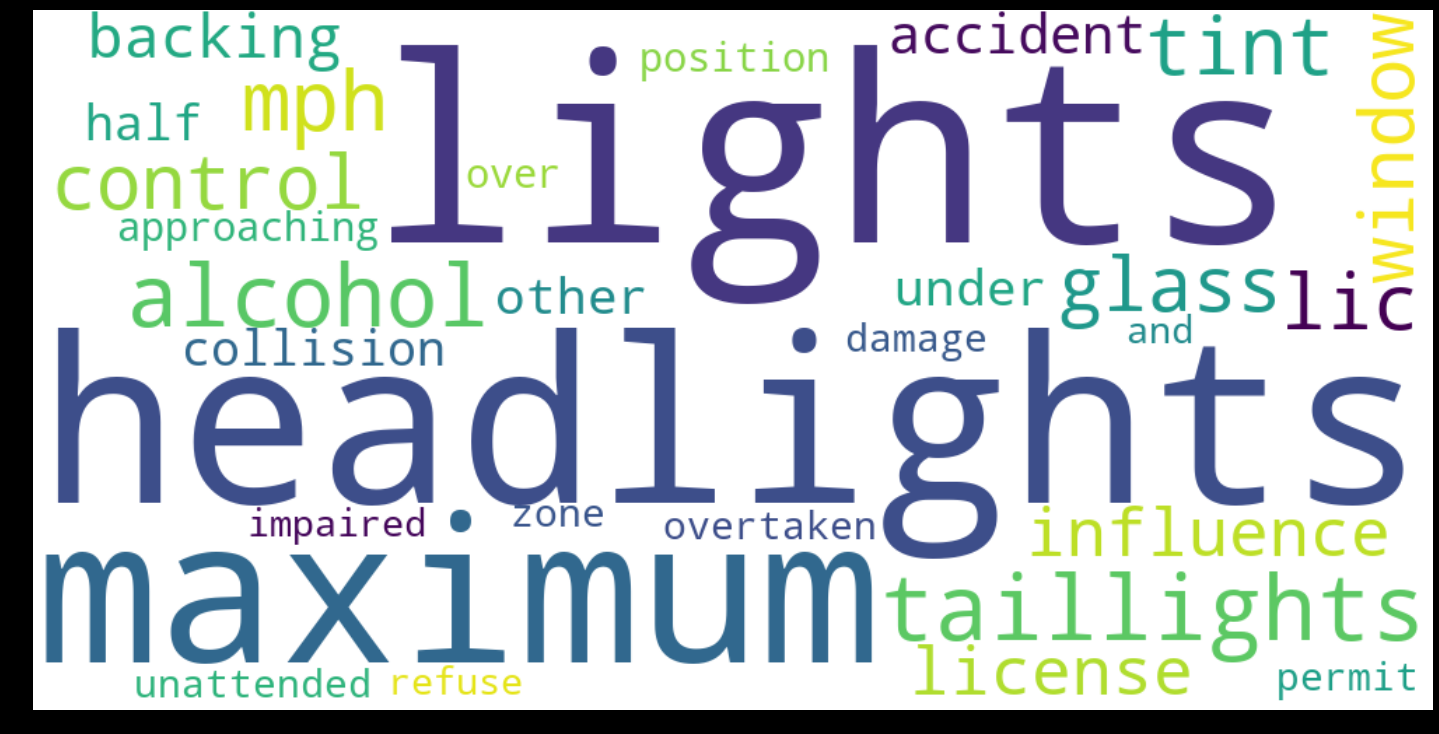

In [67]:
top_features_df = coefs_with_fns_df.copy()
top_features_df['coefficient'] = top_features_df['coefficient']*(-10)

data = dict(zip(top_features_df['feature'].tolist(), top_features_df['coefficient'].tolist()))


wordcloud_obj = wordcloud.WordCloud(
    width = 1000,
    height = 500,
    background_color = 'white',
    max_words=30,
    stopwords = wordcloud.STOPWORDS)

wordcloud_obj.generate_from_frequencies(data)

fig = plt.figure(
    figsize = (20, 10),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud_obj, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [68]:
coefs_with_fns_df.sort_values(by='coefficient', ascending=False, inplace=True)
coefs_with_fns_df.head(10)

,feature,coefficient
415,limit,3.713129
277,equipment,2.150159
280,exceeding,1.458529
412,light,1.445122
551,proper,1.303696
748,wearing,1.301892
719,unsafe,1.292673
552,properly,1.271139
442,minimum,1.241607
716,unlawfully,1.230900


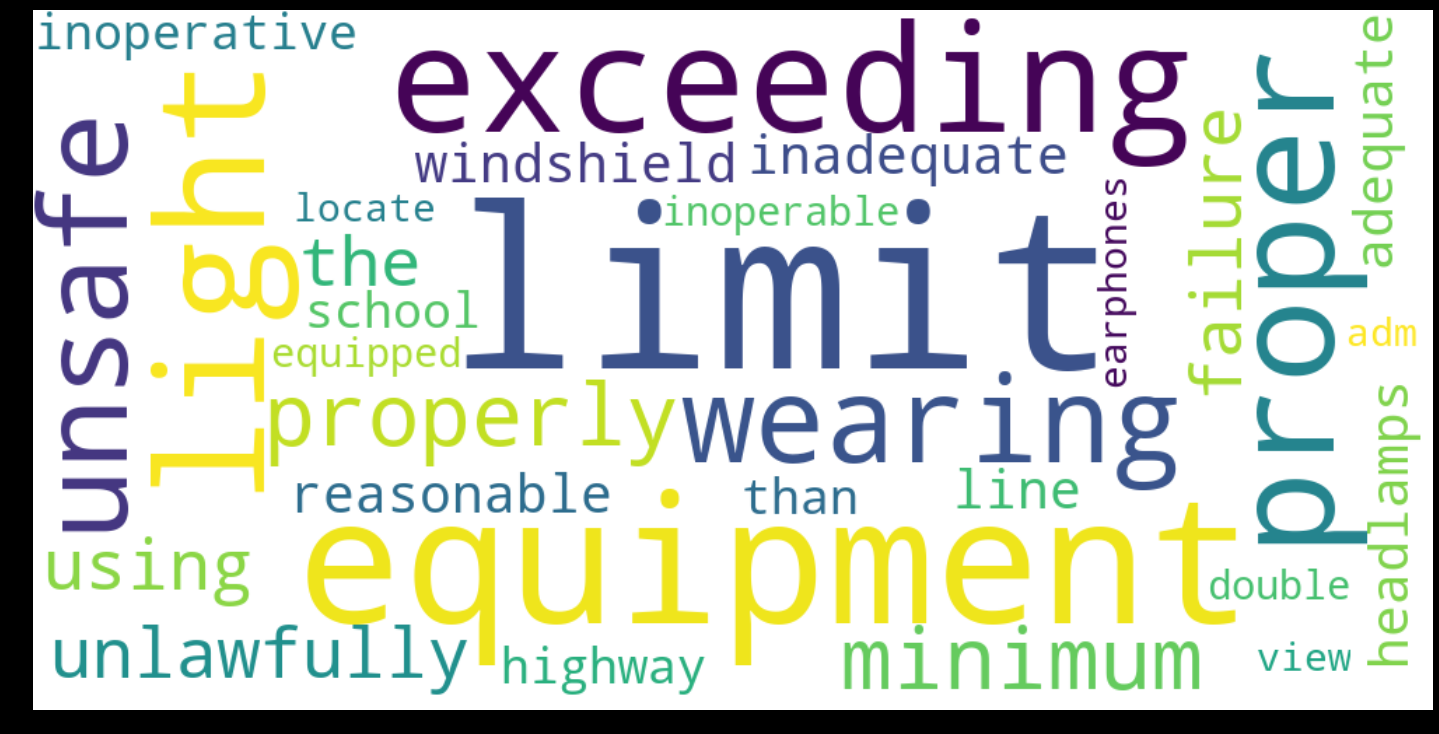

In [69]:
top_features_df = coefs_with_fns_df
top_features_df['coefficient'] = top_features_df['coefficient']*(10)

data = dict(zip(top_features_df['feature'].tolist(), top_features_df['coefficient'].tolist()))


wordcloud_obj = wordcloud.WordCloud(
    width = 1000,
    height = 500,
    background_color = 'white',
    max_words=30,
    stopwords = wordcloud.STOPWORDS)

wordcloud_obj.generate_from_frequencies(data)

fig = plt.figure(
    figsize = (20, 10),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud_obj, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

### Support Vector Machine

In [70]:
# instantiate a SVM model
svm = SGDClassifier(max_iter=100, tol=None)

In [72]:
# train the model using X_train_dtm
%time svm.fit(X_train_dtm, y_train)

Wall time: 167 ms


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=100,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=None, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [74]:
# make class predictions for X_test_dtm
y_pred_class = svm.predict(X_test_dtm)

In [75]:
# calculate accuracy of class predictions
print(metrics.accuracy_score(y_test, y_pred_class))

0.7568


In [76]:
# calculate precision and recall
print(classification_report(y_test, y_pred_class))

              precision    recall  f1-score   support

           0       0.70      0.87      0.78      1199
           1       0.82      0.60      0.69      1145
           2       1.00      1.00      1.00       156

   micro avg       0.76      0.76      0.76      2500
   macro avg       0.84      0.82      0.82      2500
weighted avg       0.77      0.76      0.75      2500



In [77]:
# calculate the confusion matrix
print(metrics.confusion_matrix(y_test, y_pred_class))

[[1048  151    0]
 [ 457  688    0]
 [   0    0  156]]


## Part 5: Improving model performance

We can improve our models using previously learnt teachniques like removing stop words and n-gramming

In [78]:
# show default parameters for CountVectorizer
countvectorizer

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [79]:
# remove English stop words
countvectorizer = CountVectorizer(stop_words='english')

- **ngram_range:** tuple (min_n, max_n), default=(1, 1)
    - The lower and upper boundary of the range of n-values for different n-grams to be extracted.
    - All values of n such that min_n <= n <= max_n will be used.

In [80]:
# include n-grams
countvectorizer = CountVectorizer(ngram_range=(1, 3))

- **max_df:** float in range [0.0, 1.0] or int, default=1.0
    - When building the vocabulary, ignore terms that have a document frequency strictly higher than the given threshold (corpus-specific stop words).
    - If float, the parameter represents a proportion of documents.
    - If integer, the parameter represents an absolute count.

In [81]:
# ignore terms that appear in more than 50% of the documents
countvectorizer = CountVectorizer(max_df=0.5)

- **min_df:** float in range [0.0, 1.0] or int, default=1
    - When building the vocabulary, ignore terms that have a document frequency strictly lower than the given threshold. (This value is also called "cut-off" in the literature.)
    - If float, the parameter represents a proportion of documents.
    - If integer, the parameter represents an absolute count.

In [83]:
# only keep terms that appear in at least 2 documents
countvectorizer = CountVectorizer(min_df=2)

## Part 6.  Troubleshooting results
Focus on predictions with low confidence level

What we are trying to do is to identify sentences wherein the probability to assign it to one of the classes is not very high. After identifying such records we can create/add more rules to help classify such sentences to further imporve the accuracy of our results

In [84]:
X_test_df = pd.DataFrame(X_test)
X_test_df.reset_index(inplace=True, drop=True)

y_test_df = pd.DataFrame(y_test)
y_test_df.reset_index(inplace=True, drop=True)

#### Scoring the test results and appending both class and probabilities

In [85]:
y_pred_prob = logreg.predict_proba(X_test_dtm)
y_pred_class = logreg.predict(X_test_dtm)

In [86]:
y_pred_prob_df = pd.DataFrame(y_pred_prob)
y_pred_prob_df.columns = ['0-prob', '1-prob', '2-prob']

y_pred_class_df = pd.DataFrame(y_pred_class)
y_pred_class_df.columns = ['predicted']

#### Combining the results and focusing on low confidence levels

In [87]:
results_df = X_test_df.join(y_test_df).join(y_pred_class_df).join(y_pred_prob_df)

In [88]:
results_review_df = results_df[(results_df['0-prob'] < 0.6) & (results_df['1-prob'] < 0.6) & (results_df['2-prob'] < 0.6)]
results_review_df.shape

(437, 6)

In [89]:
pd.set_option('display.max_colwidth', 200)

In [90]:
results_review_df.head(10)

,description,violation_flag,predicted,0-prob,1-prob,2-prob
6,OPERATING VEHICLE ON HIGHWAY WITH UNAUTHORIZED WINDOW TINTING MATERIAL,0,0,0.571531,0.425385,0.003085
17,FAILURE TO SECURELY FASTENREGISTRATION PLATE TO VEHICLE,0,1,0.475841,0.523970,0.000189
23,OPERATING VEHICLE ON HIGHWAY WITH UNAUTHORIZED WINDOW TINTING MATERIAL,1,0,0.571531,0.425385,0.003085
32,DRIVING A MOTOR VEH WITHOUT A VALID MEDICAL EXAMINERS CERTIFICATE IN POSSESSION,0,0,0.545384,0.453857,0.000759
36,DRIVING VEHICLE ON HIGHWAY WITH SUSPENDED REGISTRATION,0,0,0.555488,0.444437,0.000075
42,DISPLAYING EXPIRED REGISTRATION PLATE ISSUED BY ANY STATE,1,0,0.568942,0.428900,0.002158
46,DRIVER USING HANDS TO USE HANDHELD TELEPHONE WHILEMOTOR VEHICLE IS IN MOTION,1,0,0.506190,0.493447,0.000363
47,OPERATING VEHICLE ON HIGHWAY WITH UNAUTHORIZED WINDOW TINTING MATERIAL,1,0,0.571531,0.425385,0.003085
50,DRIVER USING HANDS TO USE HANDHELD TELEPHONE WHILEMOTOR VEHICLE IS IN MOTION,0,0,0.506190,0.493447,0.000363
56,DRIVING VEHICLE ON HIGHWAY WITH SUSPENDED REGISTRATION,0,0,0.555488,0.444437,0.000075


##### As we can see 1st and 3rd rows as well as 7th and 9th row comtain the same decription but the violation flag was different for both as in real life situation these might be the cases. Hence it is not possible to imporve the model through any way in such scenarios and hence in NLP we rarely achieve 90% + accuracy scores